<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula1a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
data['data'][:10,:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564],
       [ 0.06350368,  0.05068012, -0.00189471,  0.06662945,  0.09061988],
       [ 0.04170844,  0.05068012,  0.06169621, -0.04009893, -0.01395254],
       [-0.07090025, -0.04464164,  0.03906215, -0.03321323, -0.01257658]])

In [6]:
data['target'][:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [9]:
from collections import Counter
Counter(sorted(data['target']))

Counter({25.0: 1,
         31.0: 1,
         37.0: 1,
         39.0: 2,
         40.0: 1,
         42.0: 3,
         43.0: 1,
         44.0: 1,
         45.0: 1,
         47.0: 2,
         48.0: 3,
         49.0: 3,
         50.0: 1,
         51.0: 3,
         52.0: 4,
         53.0: 4,
         54.0: 1,
         55.0: 4,
         57.0: 1,
         58.0: 1,
         59.0: 4,
         60.0: 3,
         61.0: 2,
         63.0: 4,
         64.0: 3,
         65.0: 4,
         66.0: 2,
         67.0: 2,
         68.0: 3,
         69.0: 3,
         70.0: 2,
         71.0: 5,
         72.0: 6,
         73.0: 1,
         74.0: 2,
         75.0: 2,
         77.0: 4,
         78.0: 3,
         79.0: 1,
         80.0: 1,
         81.0: 2,
         83.0: 3,
         84.0: 4,
         85.0: 4,
         86.0: 1,
         87.0: 2,
         88.0: 4,
         89.0: 2,
         90.0: 5,
         91.0: 4,
         92.0: 2,
         93.0: 2,
         94.0: 3,
         95.0: 2,
         96.0: 4,
         9

In [7]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

2


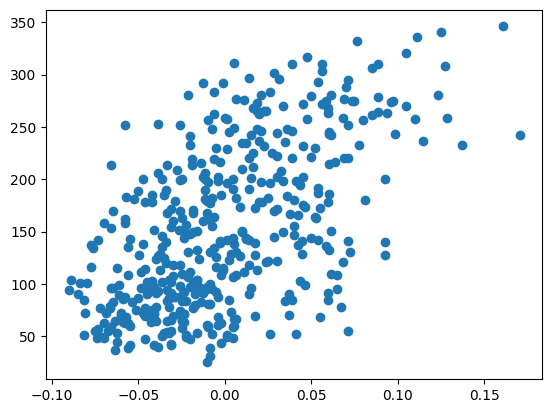

In [12]:
import matplotlib.pyplot as plt
for i in [2]: # range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

In [15]:
X[:,2].shape, X[:,2:3].shape

((442,), (442, 1))

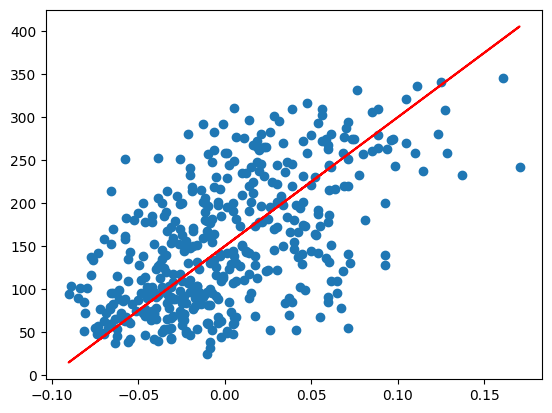

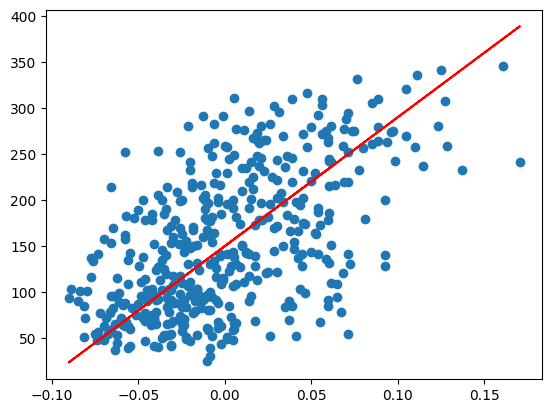

In [19]:
X2 = X[:,2:3]
def modelo_linear(X, w, b):
    y = w*X + b
    return y
ypred = modelo_linear(X2, 1500, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()
ypred = modelo_linear(X2, 1400, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [20]:
ypred.shape, y.shape

((442, 1), (442,))

In [23]:
# mean absolute error
def mae(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    yabs = abs(ydif)
    mae = yabs.mean()
    return mae

mae(y, modelo_linear(X2, 1500, 150)), mae(y, modelo_linear(X2, 1400, 150))

(53.93453917420422, 52.694626099275105)

In [24]:
# mean squared error
def mse(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    ysquared = ydif**2
    mse = ysquared.mean()
    return mse

mse(y, modelo_linear(X2, 1500, 150)), mse(y, modelo_linear(X2, 1400, 150))

(4580.803662551777, 4354.303780372608)

In [25]:
from math import sqrt
# root mean squared error
def rmse(y, ypred):
    ydif =  y.reshape(-1,1) - ypred
    ysquared = ydif**2
    mse = ysquared.mean()
    rmse = sqrt(mse)
    return rmse

rmse(y, modelo_linear(X2, 1500, 150)), rmse(y, modelo_linear(X2, 1400, 150))

(67.68163460313127, 65.98714860010703)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, modelo_linear(X2, 1500, 150)), mean_squared_error(y, modelo_linear(X2, 1400, 150))

(4580.803662551777, 4354.303780372608)

In [27]:
mean_squared_error(y, modelo_linear(X2, 0, 0))

29074.481900452487

3890.4565896189906


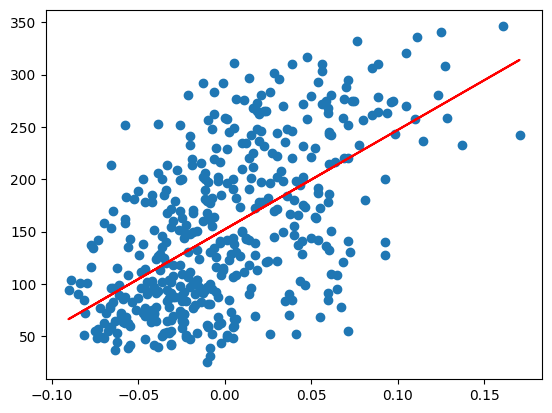

In [49]:
import numpy as np

def addBias(X):
  bias = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X = addBias(X)
    self.w = np.random.uniform(size=(X.shape[1], 1))
    for _ in range(10000):
      ypred = X @ self.w
      erros = ypred - y.reshape(-1,1)
      ajuste = X.T @ erros
      self.w = self.w - ajuste * 0.001

  def predict(self, X):
    X = addBias(X)
    ypred = X @ self.w
    return ypred

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()